In [388]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1. z-score
- Z-score与原始分数的分布形状相同

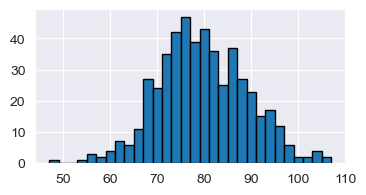

In [389]:
# create a random score list
population_mean = 80
population_std = 10
rnd_array = np.random.normal(population_mean, population_std, 500).astype('int')
fig = plt.figure(figsize=(4,2))
ax = fig.subplots()
ax.hist(rnd_array, edgecolor='black', bins=30)
plt.show()

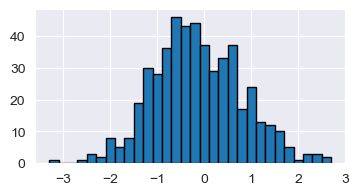

In [390]:
# standard normal distribution
standard_form = (rnd_array - population_mean) / population_std
fig = plt.figure(figsize=(4,2))
ax = fig.subplots()
ax.hist(standard_form, edgecolor='black', bins=30)
plt.show()

### 2. t-score

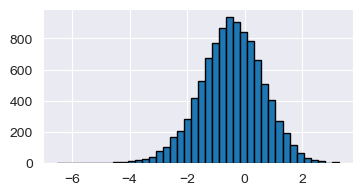

In [391]:
sample_size = 20
df = pd.DataFrame(columns=['t_score'])
for i in range(10000):
    sample = np.random.choice(rnd_array,sample_size)
    sample_mean = np.mean(sample)
    sample_std = np.std(sample)
    t = (sample_mean - population_mean) / (sample_std / np.sqrt(sample_size))
    df.loc[len(df)] = t
fig = plt.figure(figsize=(4,2))
ax = fig.subplots()
ax.hist(df, edgecolor='black', bins=40)
plt.show()

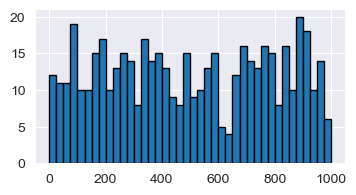

In [392]:
# 假如初识数据不是正态分布，也可通过t-score转化成正态分布
rnd_array_2 = np.random.randint(0,1000, size=500)
fig = plt.figure(figsize=(4,2))
ax = fig.subplots()
ax.hist(rnd_array_2, edgecolor='black', bins=40)
plt.show()

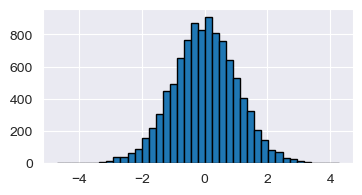

In [393]:
population_mean = np.mean(rnd_array_2)
sample_size = 50
df_2 = pd.DataFrame(columns=['t_score'])
for i in range(10000):
    sample = np.random.choice(rnd_array_2,sample_size)
    sample_mean = np.mean(sample)
    sample_std = np.std(sample)
    t = (sample_mean - population_mean) / (sample_std / np.sqrt(sample_size))
    df_2.loc[len(df_2)] = t
fig = plt.figure(figsize=(4,2))
ax = fig.subplots()
ax.hist(df_2, edgecolor='black', bins=40)
plt.show()

## 3. 单样本t检测

#### 数据创建

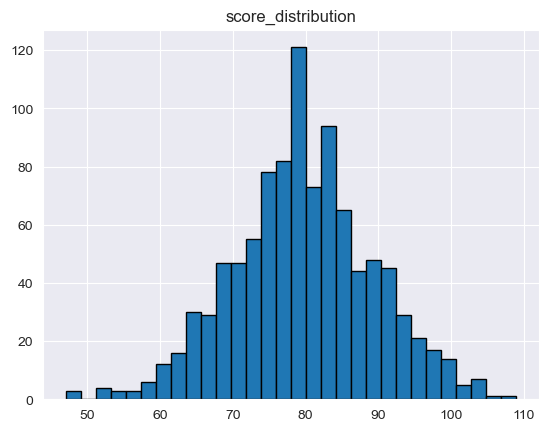

In [394]:
# create data
school_score = np.random.normal(80,10,1000).astype(int)  # 均值80，方差10，样本容量1000
fig = plt.figure()
ax1 = fig.subplots()
ax1.hist(school_score, edgecolor='black', bins=30)
ax1.set_title('score_distribution')
plt.show()

In [395]:
import scipy.stats as stats
from scipy.stats import t


def t_val(sample, type):
    if type == 'two-sided':
        t_val_by_scipy, p_val_by_scipy = stats.ttest_1samp(sample, popmean=80, alternative='two-sided')
    elif type == 'left':
        t_val_by_scipy, p_val_by_scipy = stats.ttest_1samp(sample, popmean=80, alternative='less')
    elif type == 'right':
        t_val_by_scipy, p_val_by_scipy = stats.ttest_1samp(sample, popmean=80, alternative='greater')
    return t_val_by_scipy

# not exactly same as t distribution
def simulate_t_distribution(population, type):
    df = pd.DataFrame(columns=['t'])
    for i in range(10000):
        sample = np.random.choice(population, 20)
        sample_t = t_val(sample, type)
        df.loc[len(df)] = sample_t
    return df

sample_size = 20
alpha = 0.05  # significance level
df = sample_size - 1
class_score = np.random.choice(school_score, sample_size)  # sample
population_score_mean = 80
class_score_mean = np.mean(class_score)
class_score_std = np.std(class_score)

#### 3.1 单样本双边检验 two-tailed t-test

accept area: [-2.093024, 2.093024], sample_t_val = 1.671069
t-score_scipy = 1.671069, p-value_scipy = 0.111098


/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


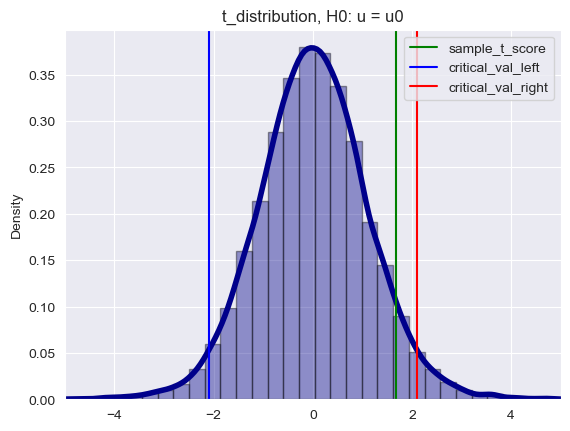

In [396]:
# H0: u = u0， 假设班级均分和年级均分无明显差异，采用单样本双边检验

# Method-1: t-score of randomly pick sample in the accept area of t-distribution
# draw critical value on two sides of t distribution
# t_distribution = simulate_t_distribution(school_score, 'two-sided')
t_distribution = t.rvs(df=12, size=20000)  # create a t-distribution
t_score = t_val(class_score, 'two-sided')  # randomly pick 20 scores
t_critical_val = t.ppf(q=1-alpha/2,df=df)  # 双边检验下的t界值
left_cv = -1 * abs(t_critical_val)
right_cv = abs(t_critical_val)
fig = plt.figure()
ax1 = fig.subplots()
# ax1.hist(t_distribution, edgecolor='black', bins=30)
# create density curve
sns.distplot(t_distribution,hist=True, kde=True,
             bins=int(180/5), color = 'darkblue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax1.axvline(x = t_score, color = 'g', label = 'sample_t_score')
ax1.axvline(x = left_cv, color = 'b', label = 'critical_val_left')
ax1.axvline(x = right_cv, color = 'r', label = 'critical_val_right')
ax1.set_title('t_distribution, H0: u = u0')
ax1.set_xlim(-5,5)
ax1.legend(loc='best')
print('accept area: [%.6f, %.6f], sample_t_val = %.6f' % (left_cv, right_cv, t_score))

# Method-2: calculate the p-value
t_val_by_scipy, p_val_by_scipy = stats.ttest_1samp(class_score, popmean=80, alternative='two-sided')
print('t-score_scipy = %.6f, p-value_scipy = %.6f' % (t_val_by_scipy, p_val_by_scipy))

#### 3.2 单样本单边检验

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


-0.9112301950240234
accept area: [-1.729133, inf], sample_t_val = -0.888157
t-score_scipy = -0.888157, p-value_scipy = 0.192781


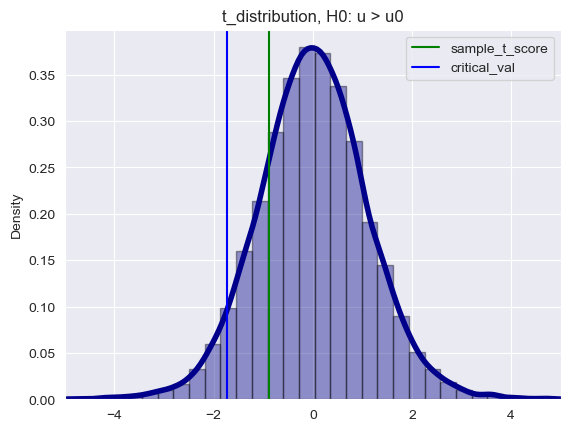

In [397]:
# left tailed t-test
# H0: u > u0, 班级均分大于学校整体均分，采用左尾单边检测
class_score = np.random.choice(school_score, sample_size)  # sample
t_by_hand = (np.mean(class_score)-80)/(np.std(class_score)/np.sqrt(20))
print(t_by_hand)
t_score = t_val(class_score, 'left')  # randomly pick 20 scores
t_critical_val = t.ppf(q=alpha,df=df) # 左尾单边检验下的t界值
fig = plt.figure()
ax2 = fig.subplots()
# ax2.hist(t_distribution, edgecolor='black', bins=30)
# create density curve
sns.distplot(t_distribution,hist=True, kde=True,
             bins=int(180/5), color = 'darkblue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax2.axvline(x = t_score, color = 'g', label = 'sample_t_score')
ax2.axvline(x = t_critical_val, color = 'b', label = 'critical_val')
ax2.set_title('t_distribution, H0: u > u0')
ax2.set_xlim(-5,5)
ax2.legend(loc='best')
print('accept area: [%.6f, inf], sample_t_val = %.6f' % (t_critical_val, t_score))

# calculate the p-value
t_val_by_scipy, p_val_by_scipy = stats.ttest_1samp(class_score, popmean=80, alternative='less')
print('t-score_scipy = %.6f, p-value_scipy = %.6f' % (t_val_by_scipy, p_val_by_scipy))

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


accept area: [-inf, 1.729133], sample_t_val = 1.783793
t-score_scipy = 1.783793, p-value_scipy = 0.045219


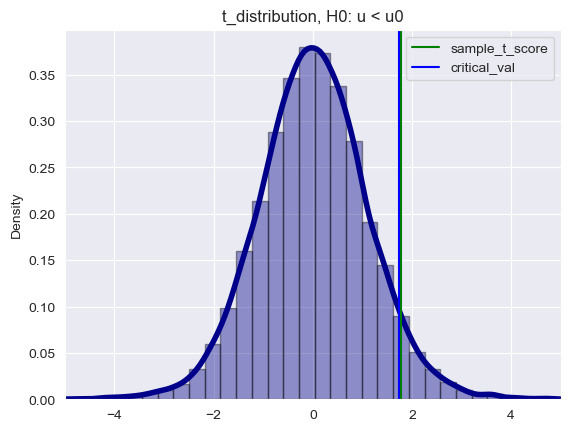

In [398]:
# right tailed t-test
# H0: u < u0, 班级均分小于学校整体均分，采用右尾单边检测
class_score = np.random.choice(school_score, sample_size)  # sample
t_score = t_val(class_score, 'right')  # randomly pick 20 scores
t_critical_val = t.ppf(q=1-alpha,df=df) # 右尾单边检验下的t界值
fig = plt.figure()
ax3 = fig.subplots()
# ax2.hist(t_distribution, edgecolor='black', bins=30)
# create density curve
sns.distplot(t_distribution,hist=True, kde=True,
             bins=int(180/5), color = 'darkblue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax3.axvline(x = t_score, color = 'g', label = 'sample_t_score')
ax3.axvline(x = t_critical_val, color = 'b', label = 'critical_val')
ax3.set_title('t_distribution, H0: u < u0')
ax3.set_xlim(-5,5)
ax3.legend(loc='best')
print('accept area: [-inf, %.6f], sample_t_val = %.6f' % (t_critical_val, t_score))

# calculate the p-value
t_val_by_scipy, p_val_by_scipy = stats.ttest_1samp(class_score, popmean=80, alternative='greater')
print('t-score_scipy = %.6f, p-value_scipy = %.6f' % (t_val_by_scipy, p_val_by_scipy))

## 4. 配对样本t检验

In [399]:
pre_score = np.array([65,75,69,85,77,80,82,70,73,79,81,69,75,78,74,76,78,80,69,77])
post_score =np.array([67,76,66,88,78,77,83,77,74,81,80,73,78,78,79,80,81,79,68,80])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


t = 2.681681178383636 , p = 0.007380343574833003
accept area: [-inf, 1.729133], sample_t_val = 2.681681


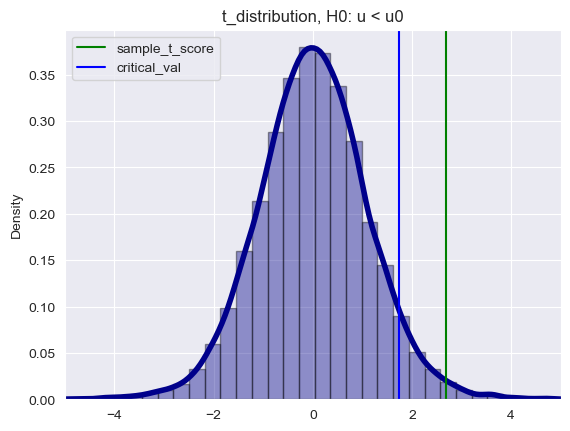

In [400]:
# H0： mean(post_score) < mean(pre_post) , 假设受培训后的score的均值低于培训前的score均值
paired_t, paired_p = stats.ttest_rel(post_score, pre_score, alternative='greater')
print('t =',paired_t, ', p =',paired_p)
t_critical_val = t.ppf(q=1-alpha,df=df) # 右尾单边检验下的t界值
fig = plt.figure()
ax4 = fig.subplots()
# ax2.hist(t_distribution, edgecolor='black', bins=30)
# create density curve
sns.distplot(t_distribution,hist=True, kde=True,
             bins=int(180/5), color = 'darkblue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax4.axvline(x = paired_t, color = 'g', label = 'sample_t_score')
ax4.axvline(x = t_critical_val, color = 'b', label = 'critical_val')
ax4.set_title('t_distribution, H0: u < u0')
ax4.set_xlim(-5,5)
ax4.legend(loc='best')
print('accept area: [-inf, %.6f], sample_t_val = %.6f' % (t_critical_val, paired_t))

## 5. 独立双样本t检验

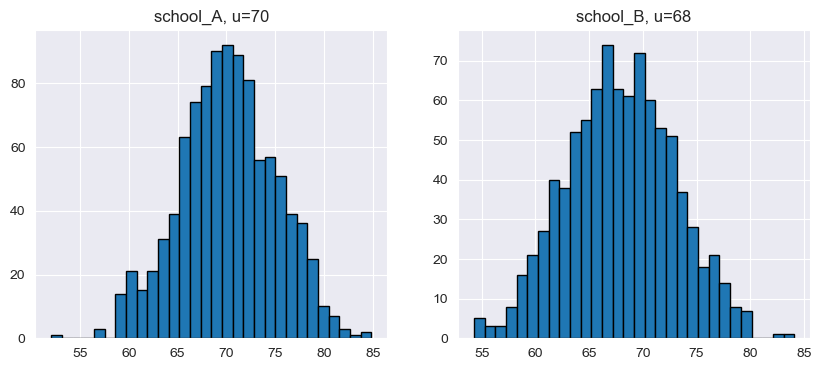

In [401]:
# 情景：从两个学校各抽取20名学生，来验证两个学校的成绩来自同一总体
# 1. 样本分别来自两个学校的成绩，相互独立 ---> 样本独立性成立
# 2. 在样本数足够多的情况下，学生成绩必然呈现正态分布 --> 样本正态性成立
school_A_score = np.random.normal(70, 5, 1000)
school_B_score = np.random.normal(68, 5, 900)
fig = plt.figure(figsize=(10,4))
A_plt = fig.add_subplot(121)
B_plt = fig.add_subplot(122)
A_plt.hist(school_A_score, edgecolor='black', bins=30)
B_plt.hist(school_B_score, edgecolor='black', bins=30)
A_plt.set_title('school_A, u=70')
B_plt.set_title('school_B, u=68')
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


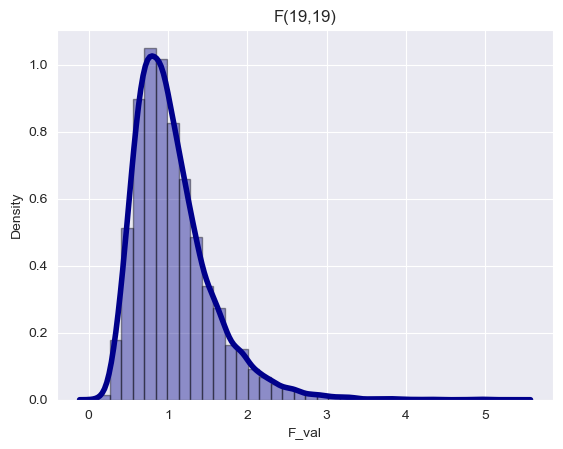

In [402]:
# 模拟f-分布
def f_distribution(population_1, population_2):
    df_F_val = pd.DataFrame(columns=['F_val'])
    for i in range(10000):
        sample_1 = np.random.choice(population_1, 20)
        sample_2 = np.random.choice(population_2, 20)
        F = (np.var(sample_1))/(np.var(sample_2))
        df_F_val.loc[len(df_F_val)] = F
    return df_F_val

df_F_val = f_distribution(school_A_score, school_B_score)
# create density curve
sns.distplot(df_F_val['F_val'],hist=True, kde=True,
             bins=int(180/5), color = 'darkblue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.title('F(19,19)')  # 分子和分母自由度df = （n1 - 1, n2 - 1）
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


f_val = 1.309866, p_val = 0.562093
accept area: [0.395812, 2.526451]
不拒绝H0，认为这两个总体具有方差齐性,可以进行双样本t检验。


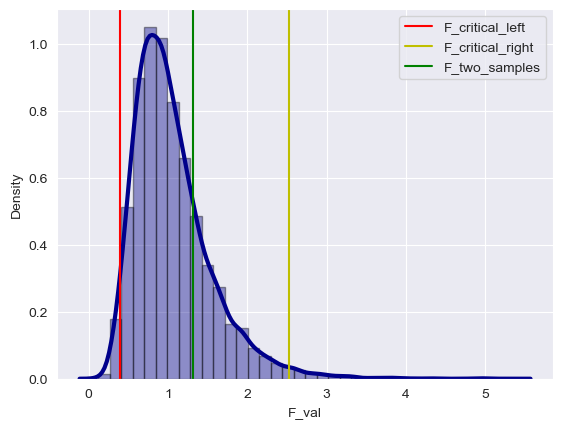

In [403]:
# F-test：两个样本的方差是否相同（具有方差齐性），从而推导出两个总体的方差相同
# H0: sigma1^2 - sigma2^2 = 0, 两样本来自同一大样本，假设随机每次抽取两个样本的F值为1
# randomly pick 20 scores from each school
A_sample = np.random.choice(school_A_score, 20)
B_sample = np.random.choice(school_B_score, 20)

# find F critical value of two-tail test
dfn = len(A_sample) - 1  # 分子
dfd = len(B_sample) - 1  # 分母
F_critical_left = stats.f.ppf(q=alpha/2, dfn=dfn, dfd=dfd)  # 2.5%
F_critical_right = stats.f.ppf(q=1-alpha/2, dfn=dfn, dfd=dfd)  # 2.5%

# calculate F
F = np.var(A_sample, ddof=1) / np.var(B_sample, ddof=1)
p = 2 * min(stats.f.cdf(F, dfn, dfd), 1- stats.f.cdf(F, dfn, dfd))
print('f_val = %.6f, p_val = %.6f' % (F, p))

fig = plt.figure()
ax5 = fig.subplots()
sns.distplot(df_F_val['F_val'],hist=True, kde=True,
             bins=int(180/5), color = 'darkblue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3})
ax5.axvline(x = F_critical_left, color = 'r', label = 'F_critical_left')
ax5.axvline(x = F_critical_right, color = 'y', label = 'F_critical_right')
ax5.axvline(x = F, color = 'g', label = 'F_two_samples')

ax5.legend(loc='best')

print('accept area: [%.6f, %.6f]' % (F_critical_left, F_critical_right))
if p > alpha:
    print('不拒绝H0，认为这两个总体具有方差齐性,可以进行双样本t检验。')
else:
    print('拒绝H0')

t_val = 0.852440, p_val = 0.399311
tc_l = -2.024394, tc_r = 2.024394


/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


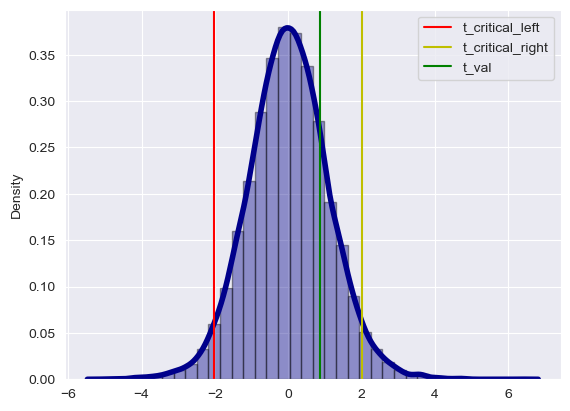

In [404]:
# H0：u1-u2 = 0, 假设两个学校的成绩来自一个总体
statistic, p_val = stats.ttest_ind(A_sample,B_sample,alternative='two-sided')
print('t_val = %.6f, p_val = %.6f' % (statistic, p_val))

df = len(A_sample) + len(B_sample) - 2
t_critical_l = stats.t.ppf(q=alpha/2,df=df)
t_critical_r = stats.t.ppf(q=1-alpha/2,df=df)
print('tc_l = %.6f, tc_r = %.6f' % (t_critical_l, t_critical_r))

fig = plt.figure()
ax6 = fig.subplots()
sns.distplot(t_distribution,hist=True, kde=True,
             bins=int(180/5), color = 'darkblue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax6.axvline(x = t_critical_l, color = 'r', label = 't_critical_left')
ax6.axvline(x = t_critical_r, color = 'y', label = 't_critical_right')
ax6.axvline(x = statistic, color='g', label= 't_val')
ax6.legend(loc='best')

## 6. 卡方检验

In [405]:
# 情景：预计某项产品面向的人群各个年龄段的比例， （15-19）：30%； （20-29）：30%； （30-39）：20%； 40-49：15%； 50+：5%

# create data
age_range = ['15-19', '20-29', '30-39', '40-49', '50+']
age_distribution_random = np.random.choice(age_range, 10000, p=[0.3, 0.3, 0.2, 0.15, 0.05])
age_distribution_ob = np.array(np.unique(age_distribution_random,return_counts=True)).T[:,1]
ob_ex_df = pd.DataFrame({'ob':age_distribution_ob})
ob_ex_df

,ob
0,2950
1,3025
2,1997
3,1521
4,507


/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


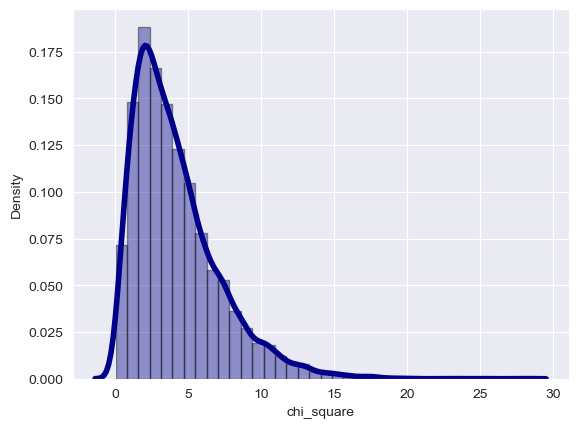

In [406]:
# 模拟 chi-square distribution
def chi_square(random_pick_1000):
    age_distribution_1000_ob = np.array(np.unique(random_pick_1000,return_counts=True)).T
    age_distribution_1000_ob = age_distribution_1000_ob[:,1].astype(int)
    combined_df = pd.DataFrame({'ob': age_distribution_1000_ob, 'ex':[300,300,200,150,50]})
    combined_df['chi'] = ((combined_df.ob - combined_df.ex)**2)/combined_df.ex
    cs = combined_df.chi.sum()
    return cs

df_chi_square = pd.DataFrame(columns=['chi_square'])
for i in range(10000):
    random_pick_1000 = np.random.choice(age_distribution_random, 1000)
    cs = chi_square(random_pick_1000)
    df_chi_square.loc[len(df_chi_square)] = cs

fig = plt.figure()
ax7 = fig.subplots()
sns.distplot(df_chi_square['chi_square'],hist=True, kde=True,
             bins=int(180/5), color = 'darkblue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.show()

chi_square = 7.020000, p_val = 0.134835
chi_critical_val = 9.487729


/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


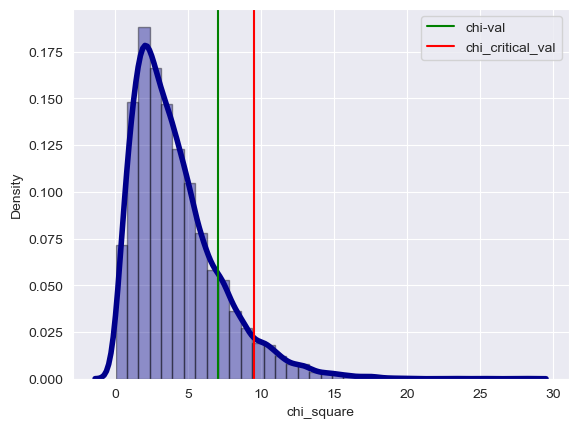

In [412]:
# chi-square test
# H0: 抽样样本符合人群比例
random_pick_1000 = np.random.choice(age_distribution_random, 1000)
random_pick_1000 = np.array(np.unique(random_pick_1000,return_counts=True)).T[:,1].astype(int)
chi, chi_p_val = stats.chisquare(random_pick_1000, f_exp=[300,300,200,150,50])
# degrees of freedom in the Chi-Square test = # of categories - 1
chi_critical_val = stats.chi2.ppf(1-.05, df=4)
fig = plt.figure()
ax8 = fig.subplots()
sns.distplot(df_chi_square['chi_square'],hist=True, kde=True,
             bins=int(180/5), color = 'darkblue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax8.axvline(x = chi, color = 'g', label = 'chi-val')
ax8.axvline(x = chi_critical_val, color = 'r', label = 'chi_critical_val')
ax8.legend(loc='best')

print('chi_square = %.6f, p_val = %.6f' % (chi, chi_p_val))
print('chi_critical_val = %.6f' % chi_critical_val)

## 7. 置信区间

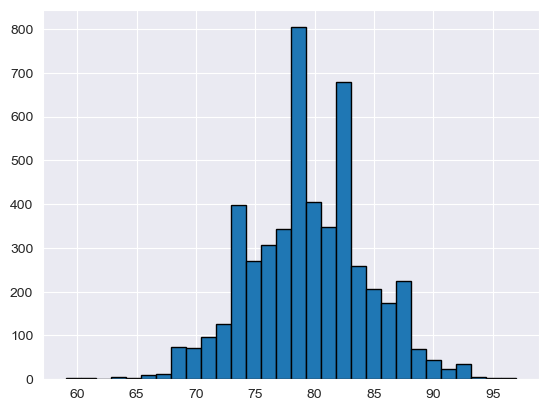

In [408]:
sample = np.random.normal(80, 5, 5000).astype(int)
plt.hist(sample, edgecolor = 'black', bins=30)
plt.show()

In [409]:
sample_size = 20
sample_pick = np.random.choice(sample, size=sample_size)
sample_mean = sample_pick.mean()  # 样本均值
sample_std = np.std(sample_pick)  # 样本标准差
df = sample_size - 1  # 自由度
alpha = 0.05
T_critical_val = stats.t.ppf(q=1-0.05/2,df=df)  # 双边t检验
scope = T_critical_val * sample_std / np.sqrt(sample_size)  # 波动范围
limit_left = sample_mean - scope
limit_right = sample_mean + scope
print(sample_mean)
print('置信区间：[%3f,%3f]' % (limit_left, limit_right))  # 通过单次抽样，反推出均值抽样分布95%接受区间

# test 10000 times
total_mean = sample.mean()
count = 0  # 均值落在区间的次数
for i in range(10000):
    sample_pick = np.random.choice(sample, size=sample_size)
    sample_mean = sample_pick.mean()  # 样本均值
    sample_std = np.std(sample_pick)  # 样本标准差
    scope = T_critical_val * sample_std / np.sqrt(sample_size)
    limit_left = sample_mean - scope
    limit_right = sample_mean + scope
    if (total_mean >= limit_left) and (total_mean <= limit_right):
        count+=1
print(round(count/10000, 2))  # 整体均值落在多次重复创建的区间中的概率在95%左右

78.4
置信区间：[75.957341,80.842659]
0.95
